<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Avocado dataset


## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Applying Linear Regression](#section4)<br>
    - 4.1 [Linear Regression Equation with Errors in consideration](#section401)<br>
        - 4.1.1 [Assumptions of Linear Regression](#sectionassumptions)<br>
    - 4.2 [Splitting X and y into training and test datasets](#section402)<br>
    
    
5. [Model evaluation](#section5)<br>
    - 5.1 [Decision Tree Regressor](#section501)<br>
    - 5.2 [Random Forest Regressor](#section502)<br>
6.[Conclusion](#section6)<br>
    - 6.1 [Comparing The RMSE Values Of The Models](#section601)<br>
    - 6.2 [Interpreting Model Coefficients](#section602)<br>


<a id=section1></a>
## 1. Problem Statement

<img src="https://78.media.tumblr.com/6046408b796cf4ef3f14ea5006a2572e/tumblr_oph4kv6j1G1s9f4joo1_500.gif" align='left'><br/>

AveragePrice of a single avocado for the types 4046,4225,4770 with type given as conventional and organic.

- We would have to predict the averageprice givne the input variables for 4046,4225,4770 and type.

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.




<a id=section2></a>
## 2. Data Loading and Description

Date - The date of the observation

AveragePrice - the average price of a single avocado - target variable

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


__Importing Packages__

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importing the Dataset

In [0]:
avocado = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

In [4]:
avocado.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


<a id=section3></a>
## 3. Exploratory Data Analysis

In [5]:
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [0]:
# drop unnamed column and rename undefined columns;
avocado = avocado.drop(['Unnamed: 0'], axis = 1)

avocado = avocado.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })

In [8]:
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado.sort_values(by=['Date'], inplace=True, ascending=True)
avocado.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


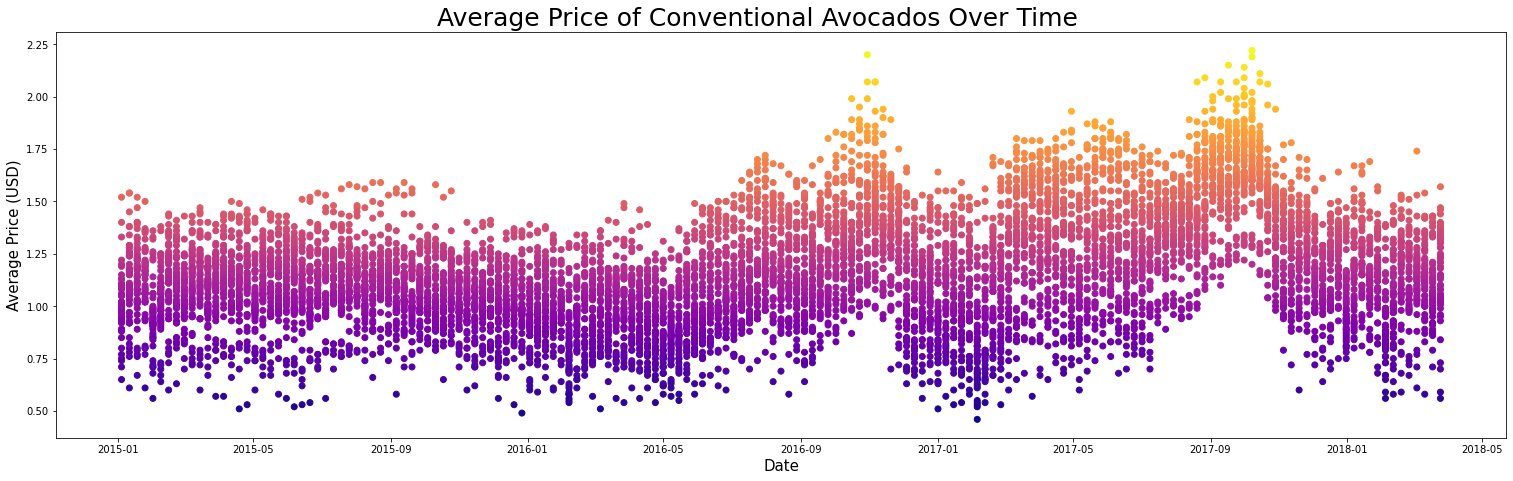

In [9]:
# Average price of Conventional Avocados over time

mask = avocado['type']== 'conventional'
pl.rc('figure', titlesize=50)
fig = pl.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = avocado[mask]['Date'].tolist()
avgPrices = avocado[mask]['AveragePrice'].tolist()

pl.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
pl.show()


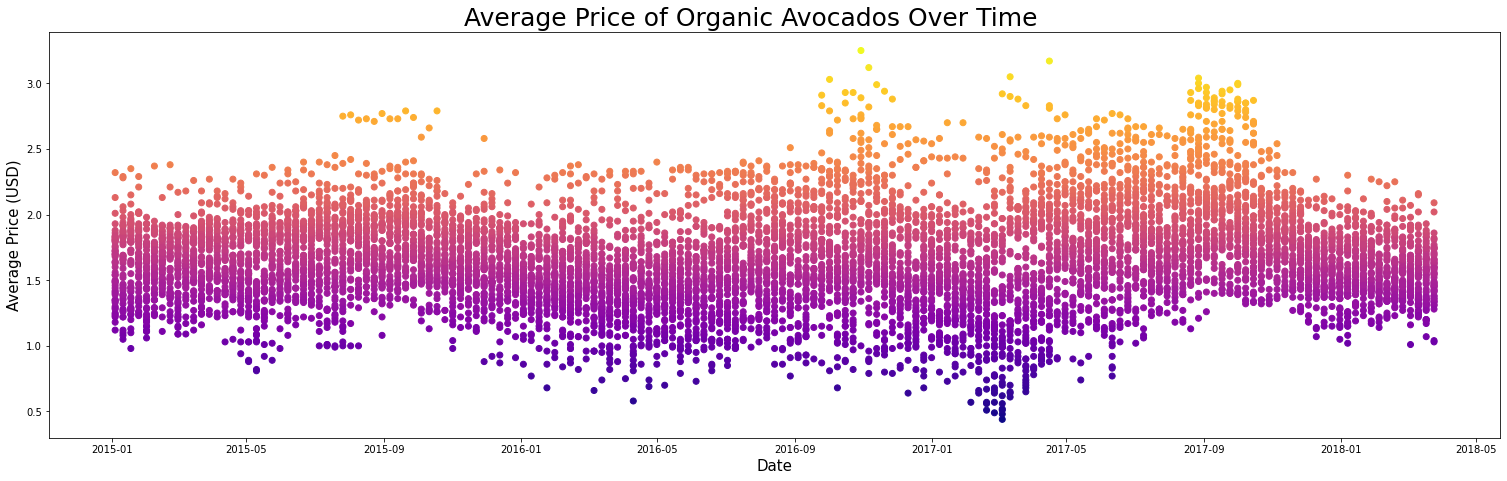

In [10]:
# Average price of Organic Avocados over time
mask = avocado['type']== 'organic'
pl.rc('figure', titlesize=50)
fig = pl.figure(figsize = (26, 7))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = avocado[mask]['Date'].tolist()
avgPrices = avocado[mask]['AveragePrice'].tolist()

pl.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
pl.show()

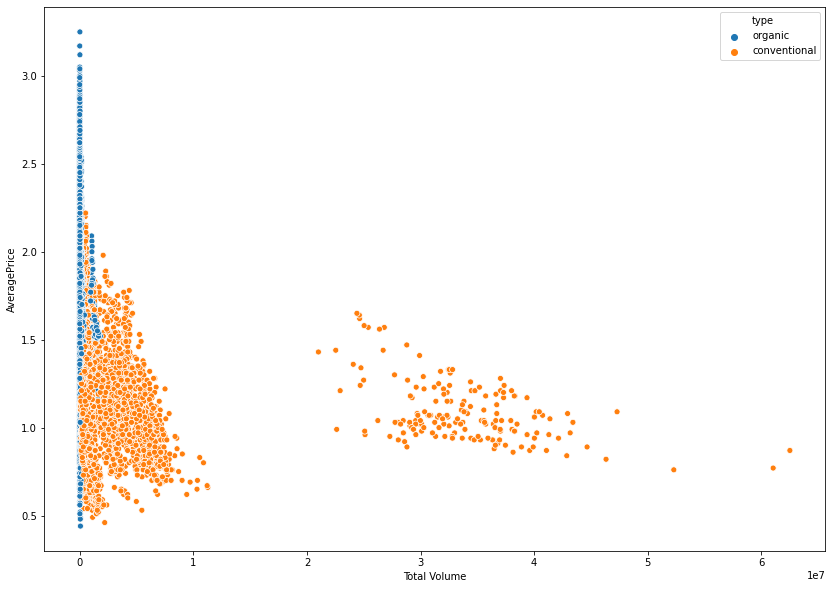

In [11]:
pl.figure(figsize=(14,10))
sns.scatterplot(x='Total Volume', y = 'AveragePrice', hue= 'type', data= avocado)

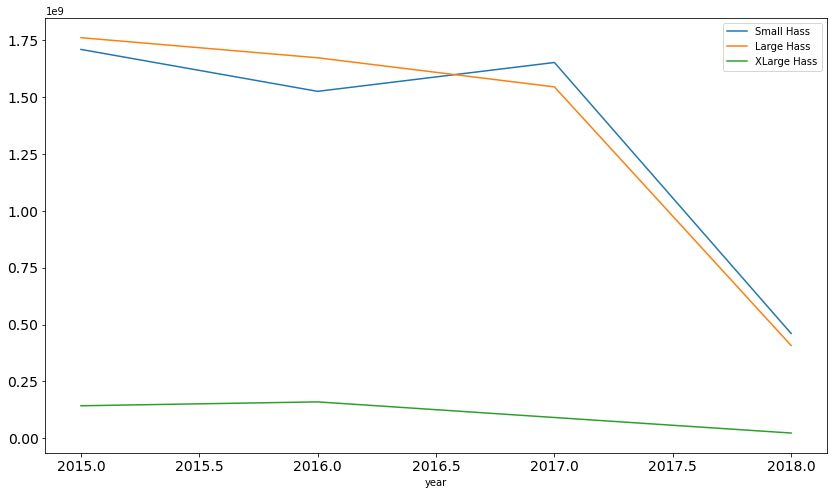

In [13]:
variant = avocado[['Small Hass', 'Large Hass', 'XLarge Hass']].groupby(avocado.year).sum()
variant.plot(kind='line', fontsize = 14, figsize=(14,8))

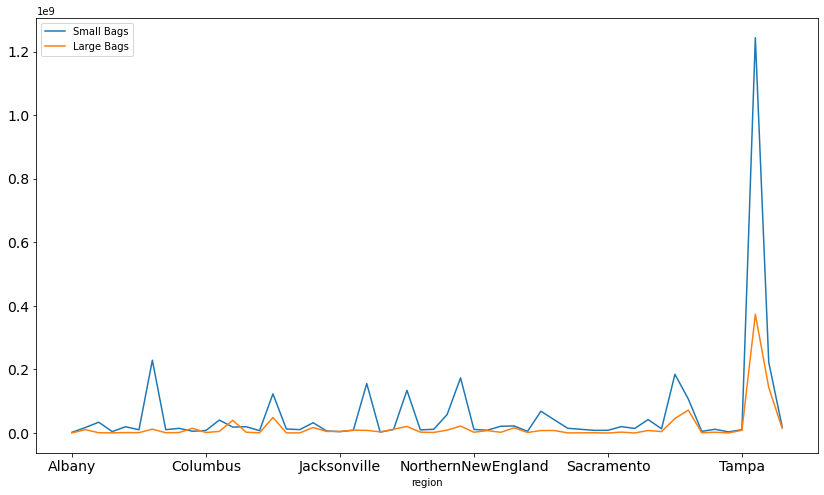

In [14]:
Bags = avocado[['Small Bags', 'Large Bags']].groupby(avocado.region).sum()
Bags.plot(kind='line', fontsize = 14,figsize=(14,8))
pl.show()

In [17]:
import plotly.offline as py
import plotly.graph_objs as go
con=avocado[avocado['type']=='conventional'].groupby('year')['Total Volume'].agg('mean')
org=avocado[avocado['type']=='organic'].groupby('year')['Total Volume'].agg('mean')

trace1=go.Bar(x=con.index,y=con,name="Conventional",
             marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.7)

trace2=go.Bar(x=con.index,y=org,name="Organic",
             marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.7)

data=[trace1,trace2]

layout=go.Layout(barmode="stack",title="Organic vs. Conventional (Mean Volume)",
                yaxis=dict(title="Volume"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

In [0]:
#Dropping the Date column (date format is not suitable for next level analysis (i.e. OHE))
avocado = avocado.drop(['Date'], axis = 1)

In [19]:
# Checking if the sample is balanced;
avocado.groupby('region').size() # Approximately, there are 338 observations from each region, sample seems balanced.

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [20]:
len(avocado.region.unique())

54

In [21]:
avocado.region.unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [22]:
# basically we can remove states and work on cities rather than analysing both (to prevent multicollinerarity)

regionsToRemove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
avocado = avocado[~avocado.region.isin(regionsToRemove)]
len(avocado.region.unique())

43

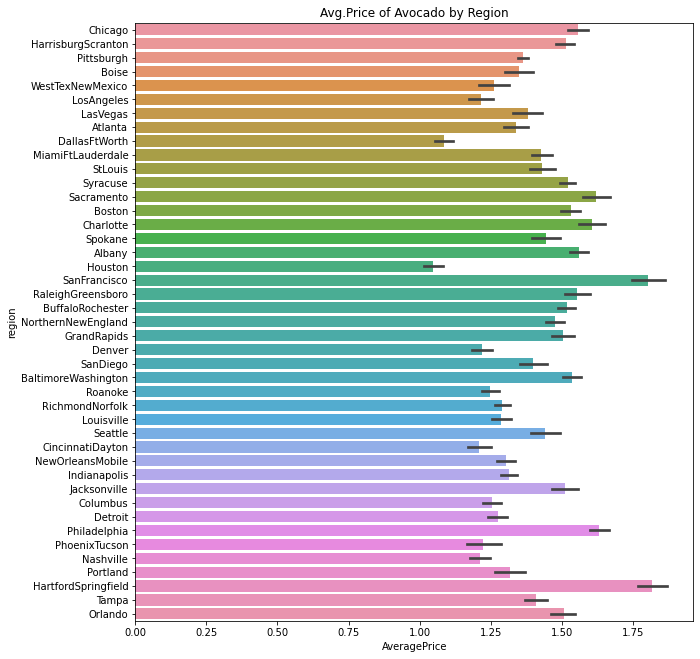

In [23]:
# The average prices by regions

pl.figure(figsize=(10,11))
pl.title("Avg.Price of Avocado by Region")
Av= sns.barplot(x="AveragePrice",y="region",data= avocado)

In [24]:
type_counts = avocado.groupby('type').size()
print(type_counts) 

type
conventional    7267
organic         7264
dtype: int64


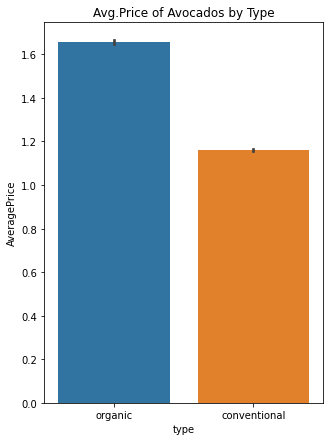

In [25]:
# The average prices of avocados by types; organic or not

pl.figure(figsize=(5,7))
pl.title("Avg.Price of Avocados by Type")
Av= sns.barplot(x="type",y="AveragePrice",data= avocado)

In [26]:
# Total Bags = Small Bags + Large Bags + XLarge Bags

# To avoid multicollinearity we ll keep S-L-XL bags and drop Total Bags

# But before droping we'd better to see the correlation between those columns:

avocado[['Small Hass', "Large Hass", "XLarge Hass",'Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr()

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
Small Hass,1.000000,0.505321,0.412247,0.653724,0.348216,0.454440,0.890380,0.684041
Large Hass,0.505321,1.000000,0.580107,0.563730,0.265454,0.308823,0.787495,0.577115
XLarge Hass,0.412247,0.580107,1.000000,0.437290,0.121320,0.492822,0.576676,0.429245
Small Bags,0.653724,0.563730,0.437290,1.000000,0.238270,0.658700,0.836906,0.956905
Large Bags,0.348216,0.265454,0.121320,0.238270,1.000000,0.080479,0.429051,0.509324
XLarge Bags,0.454440,0.308823,0.492822,0.658700,0.080479,1.000000,0.549505,0.622964
Total Volume,0.890380,0.787495,0.576676,0.836906,0.429051,0.549505,1.000000,0.869796
Total Bags,0.684041,0.577115,0.429245,0.956905,0.509324,0.622964,0.869796,1.000000


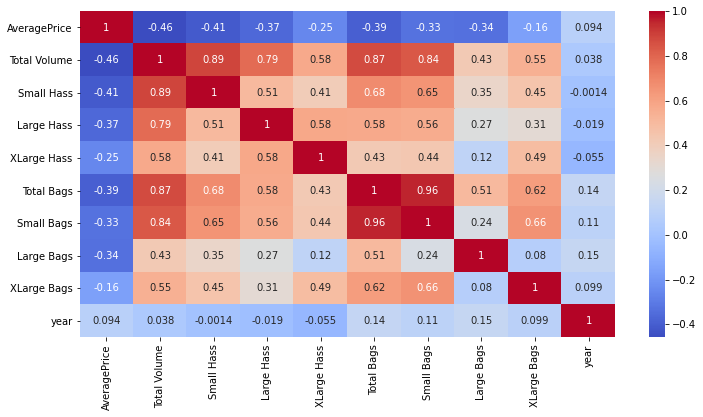

In [27]:
pl.figure(figsize=(12,6))
sns.heatmap(avocado.corr(),cmap='coolwarm',annot=True)

In [28]:
avocado_A = avocado.drop(['AveragePrice', 'Total Volume', 'Total Bags'], axis = 1).groupby('year').agg('sum')
avocado_A

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
year,,,,,,
2015,3.956835e+08,3.816794e+08,34551068.97,1.424565e+08,28409959.31,1324210.40
2016,3.373537e+08,3.684409e+08,37822298.99,2.630756e+08,80734611.45,4894984.66
2017,3.667922e+08,3.405079e+08,22968983.86,2.811956e+08,93246243.70,5384099.35
2018,1.013592e+08,8.963867e+07,5804442.33,7.920550e+07,28310113.38,1589371.50


Text(0, 0.5, '')

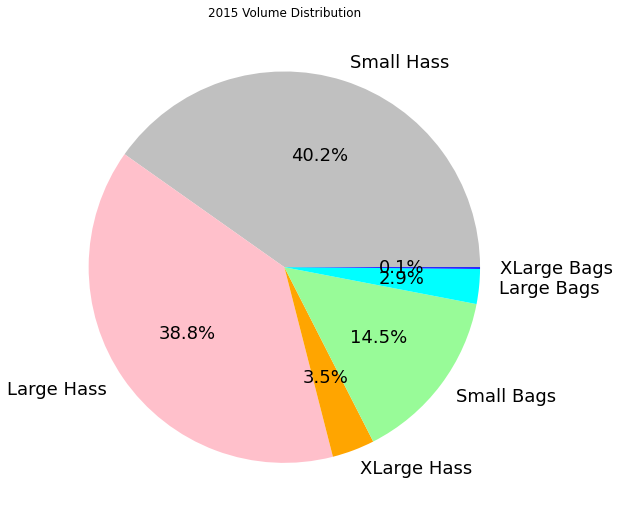

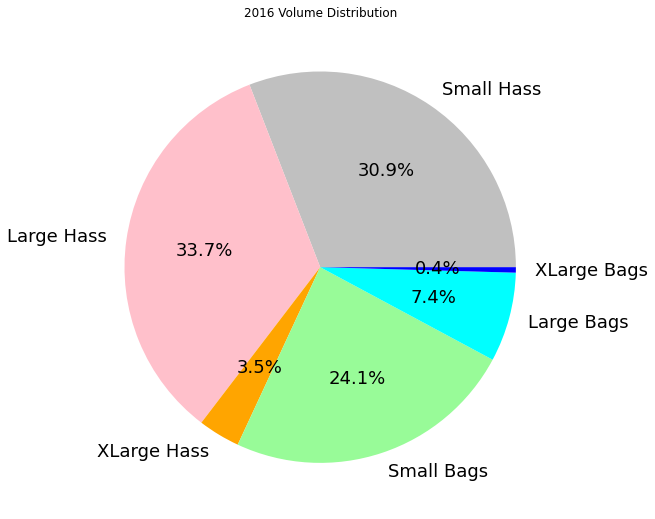

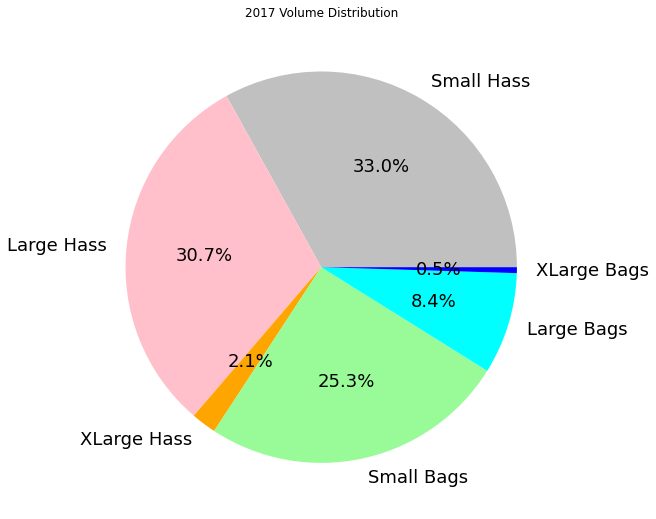

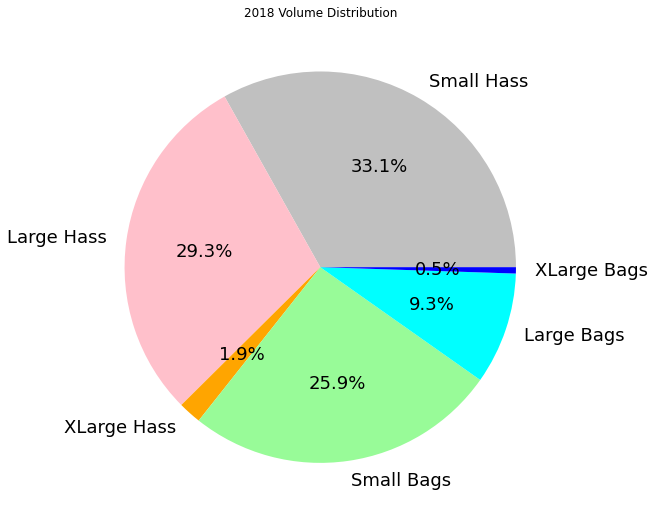

In [29]:
indexes = ['Small Hass', 'Large Hass', 'XLarge Hass', 'Small Bags', 'Large Bags', 'XLarge Bags']
series = pd.DataFrame({'2015': avocado_A.loc[[2015],:].values.tolist()[0],
                      '2016': avocado_A.loc[[2016],:].values.tolist()[0],
                      '2017': avocado_A.loc[[2017],:].values.tolist()[0],
                      '2018': avocado_A.loc[[2018],:].values.tolist()[0]}, index=indexes)
series.plot.pie(y='2015',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2015 Volume Distribution').set_ylabel('')
series.plot.pie(y='2016',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2016 Volume Distribution').set_ylabel('')
series.plot.pie(y='2017',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2017 Volume Distribution').set_ylabel('')
series.plot.pie(y='2018',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2018 Volume Distribution').set_ylabel('')

 There is a high correlation between these pairs: 

small hass & total volume  (0.89)      
total bags & total volume  (0.87)      
small bags & total bags    (0.96)      

Small Hass avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.
Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.

In [0]:
# Total Bags = Small Bags + Large Bags + XLarge Bags

avocado = avocado.drop(['Total Bags'], axis = 1)

In [0]:
# Total Volume = Small Hass +Large Hass +XLarge Hass + Total Bags , to avoid multicollinearity I also drop Total Volume column.


avocado = avocado.drop(['Total Volume'], axis = 1)

In [32]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14531 entries, 9593 to 8574
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14531 non-null  float64
 1   Small Hass    14531 non-null  float64
 2   Large Hass    14531 non-null  float64
 3   XLarge Hass   14531 non-null  float64
 4   Small Bags    14531 non-null  float64
 5   Large Bags    14531 non-null  float64
 6   XLarge Bags   14531 non-null  float64
 7   type          14531 non-null  object 
 8   year          14531 non-null  int64  
 9   region        14531 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.8+ MB


In [33]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = avocado.corr(method='pearson')
print(correlations)

              AveragePrice  Small Hass  ...  XLarge Bags   year
AveragePrice         1.000      -0.412  ...       -0.158  0.094
Small Hass          -0.412       1.000  ...        0.454 -0.001
Large Hass          -0.365       0.505  ...        0.309 -0.019
XLarge Hass         -0.253       0.412  ...        0.493 -0.055
Small Bags          -0.329       0.654  ...        0.659  0.109
Large Bags          -0.335       0.348  ...        0.080  0.150
XLarge Bags         -0.158       0.454  ...        1.000  0.099
year                 0.094      -0.001  ...        0.099  1.000

[8 rows x 8 columns]


In [34]:
# Standardizing (scaling) the variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
avocado.loc[:,'Small Hass':'XLarge Bags']= scaler.fit_transform(avocado.loc[:,'Small Hass':'XLarge Bags']) 
avocado.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,1.49,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231,organic,2015,Chicago
10009,1.68,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231,organic,2015,HarrisburgScranton
1819,1.52,-0.394,-0.331,-0.269,-0.336,-0.286,-0.231,conventional,2015,Pittsburgh
9333,1.64,-0.408,-0.580,-0.347,-0.426,-0.367,-0.231,organic,2015,Boise
2807,0.75,1.701,0.483,0.414,0.912,-0.306,-0.231,conventional,2015,WestTexNewMexico


In [0]:
# Specifying dependent and independent variables

X = avocado.drop(['AveragePrice'], axis = 1)
y = avocado['AveragePrice']
y=np.log1p(y)

In [0]:
# Labeling the categorical variables

Xcat=pd.get_dummies(X[["type","region"]], drop_first = True)

In [0]:
Xnum=X[["Small Hass","Large Hass","XLarge Hass","Small Bags","Large Bags","XLarge Bags"]]


In [38]:
X= pd.concat([Xcat, Xnum], axis = 1) # Concatenate dummy categorcal variables and numeric variables
X.shape

(14531, 49)

In [39]:
F_avocado = pd.concat([y,X],axis=1)
F_avocado.head(2)

,AveragePrice,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Nashville,region_NewOrleansMobile,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
9593,0.912,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231
10009,0.986,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231


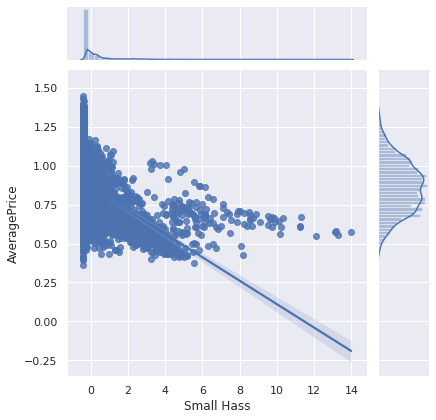

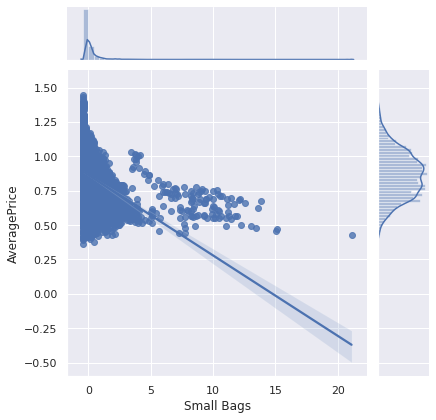

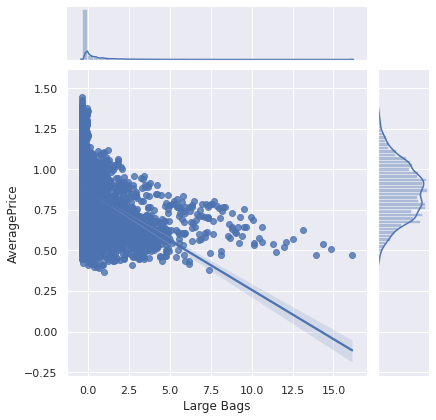

In [40]:
# Just before the regression analysis, We will visualise the highly correlated Variables with the Average Prices;

import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x="Small Hass", y="AveragePrice", data=F_avocado, kind="reg");
sns.jointplot(x="Small Bags", y="AveragePrice", data=F_avocado, kind="reg");
sns.jointplot(x="Large Bags", y="AveragePrice", data=F_avocado, kind="reg");

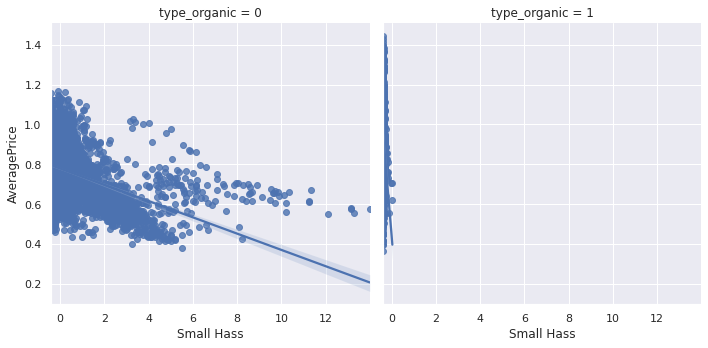

In [41]:
sns.lmplot(x="Small Hass", y="AveragePrice", col="type_organic", data=F_avocado, col_wrap=2);

# Graphs depict that organic avocados have less elasticity to the price, compared to conventional ones.

__Distribution of Features__

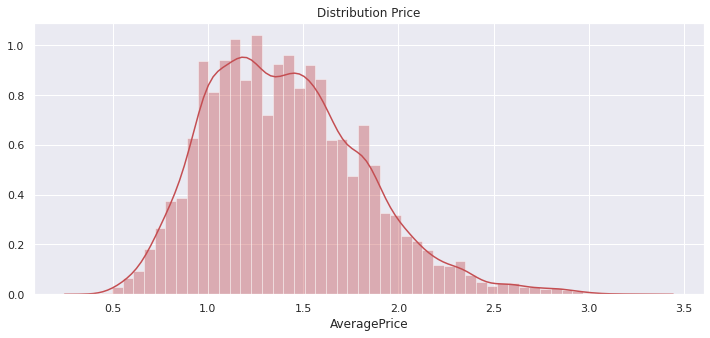

In [42]:
pl.figure(figsize=(12,5))
pl.title("Distribution Price")
ax = sns.distplot(avocado["AveragePrice"], color = 'r')




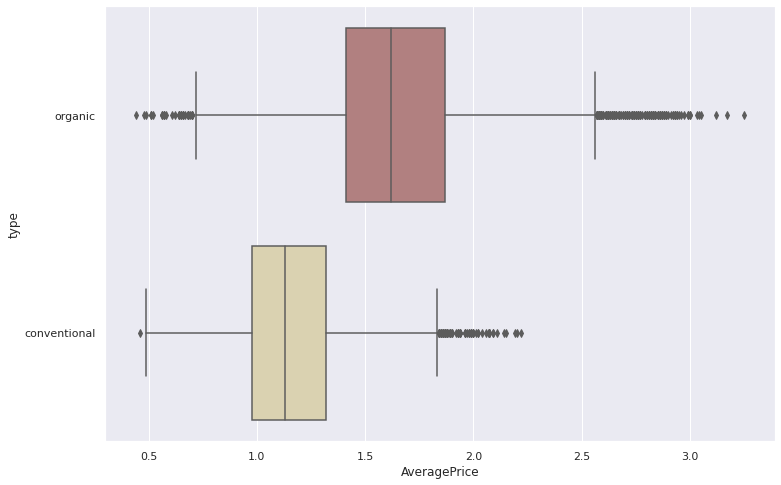

In [43]:

sns.boxplot(y="type", x="AveragePrice", data=avocado, palette = 'pink')
pl.show;

Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them. But it is likely that the price of avocado depends not only on the type. Let's look at the price of avocado from different regions in different years. Let's start with organic avocados.

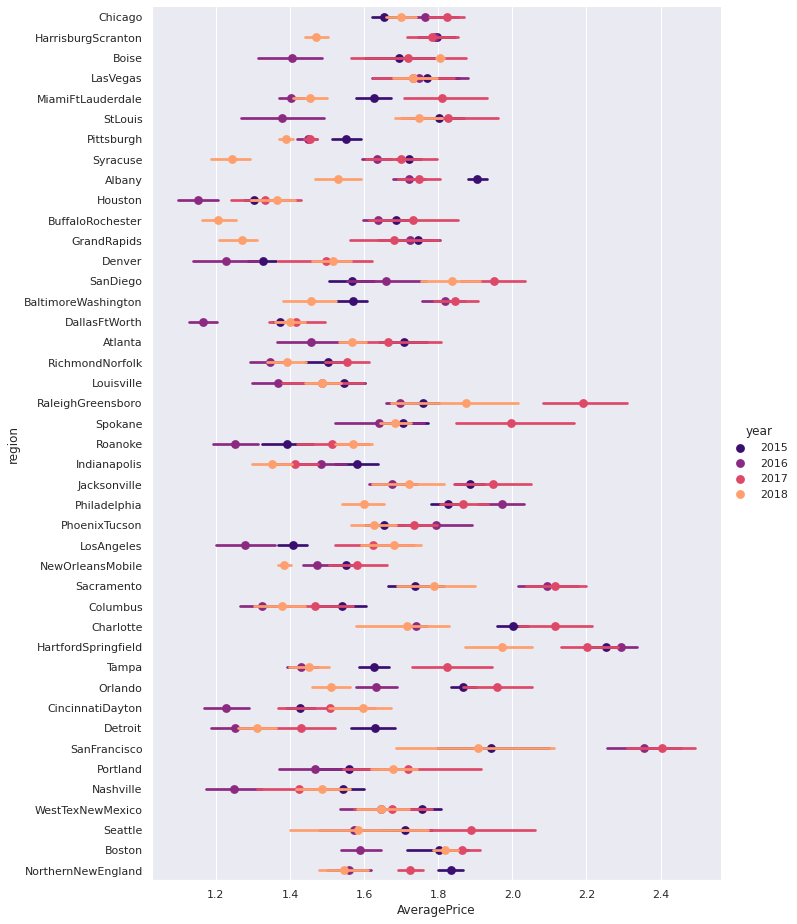

In [44]:
mask = avocado['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=avocado[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )


Oh San Francisco, 2017. In 2017, organic avocados were very expensive

So, what about conventional type?

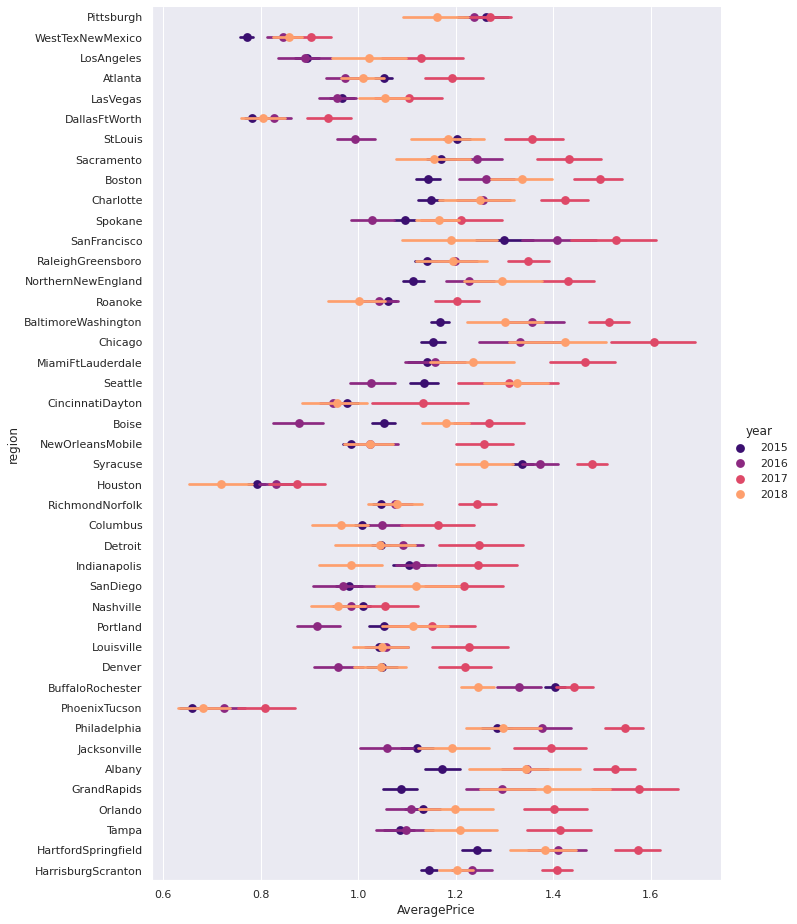

In [45]:
mask = avocado['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=avocado[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

For obvious reasons, prices are lower. The situation with the price increase in 2017 also affected this type of avocado.

Organic avocado type is more expensive. And avocado is generally more expensive with each passing year. Let's see the correlation between these features. First, let's code the categorical attribute - "type"

<a id=section4></a>
## 4. Applying Linear Regression Algorithm

<a id=section401></a>
### 4.1 Linear Regression Equation with Errors in consideration

While taking errors into consideration the equation of linear regression is: 
![image.png](attachment:image.png)
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):



<a id=sectionassumptions></a>
#### 4.1.1 Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

<a id=section402></a>
### 4.2 Splitting X and y into training and test datasets.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [47]:
X_test.shape

(2907, 49)

In [48]:
type(y_train)

pandas.core.series.Series

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)



print ("R2 of Linear Regresson:", LinReg.score(X_train,y_train) )

y_pred_test = LinReg.predict(X_test) 
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))  


y_pred_train = LinReg.predict(X_train) 
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)) 

R2 of Linear Regresson: 0.5729543331005567


In [51]:
RMSE_test

0.11229329520873493

In [52]:
y_pred_test

array([1.04270419, 0.81436537, 0.87299146, ..., 0.71683914, 0.59269838,
       1.04358165])

In [53]:
print('MAE: ',metrics.mean_absolute_error(y_test, LinReg.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, LinReg.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))))

MAE:  0.08593307092268214
MSE:  0.012609784148836093
RMSE: 0.11229329520873493


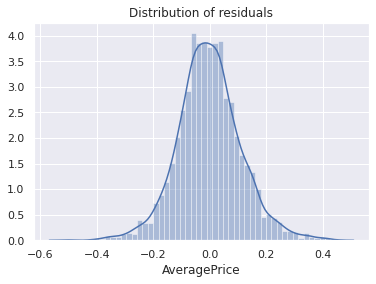

In [54]:
# Creating a Histogram of Residuals
pl.figure(figsize=(6,4))
sns.distplot(y_test - LinReg.predict(X_test))
pl.title('Distribution of residuals');

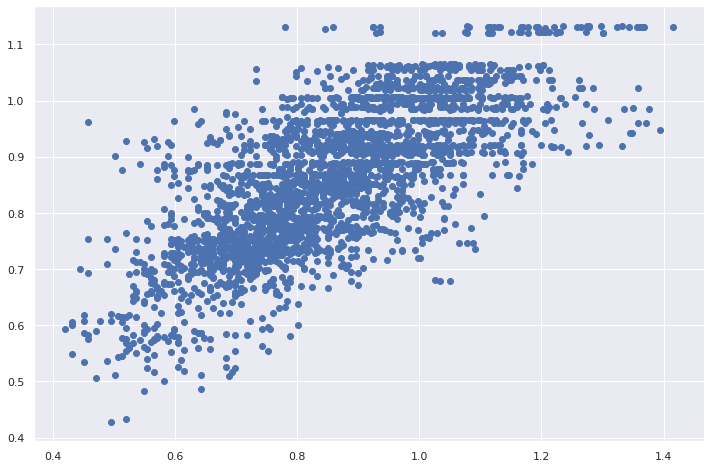

In [55]:
pl.scatter(y_test,LinReg.predict(X_test))

<a id=section5></a>
# 5.Model evaluation

 <a id=section501></a>
 5.1 Decision Tree Regressor

In [56]:
# Determining the best depth
from sklearn.tree import DecisionTreeRegressor

minDepth = 100
minRMSE = 100000


for depth in range(2,10):
  tree_reg = DecisionTreeRegressor(max_depth=depth)
  tree_reg.fit(X_train, y_train)
  y_pred = tree_reg.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  print("Depth:",depth,", MSE:", mse)
  print("Depth:",depth, ",RMSE:", rmse)
  
  if rmse < minRMSE:
    minRMSE = rmse
    minDepth = depth
    
      
print("MinDepth:", minDepth)
print("MinRMSE:", minRMSE)

Depth: 2 , MSE: 0.01515309347632512
Depth: 2 ,RMSE: 0.12309790199806461
Depth: 3 , MSE: 0.014441002890997584
Depth: 3 ,RMSE: 0.12017072393473206
Depth: 4 , MSE: 0.013605641413946691
Depth: 4 ,RMSE: 0.11664322275188856
Depth: 5 , MSE: 0.012198077048622628
Depth: 5 ,RMSE: 0.11044490503695781
Depth: 6 , MSE: 0.011325818820633013
Depth: 6 ,RMSE: 0.10642283035436058
Depth: 7 , MSE: 0.010490061026232574
Depth: 7 ,RMSE: 0.10242099895154594
Depth: 8 , MSE: 0.009983934632504974
Depth: 8 ,RMSE: 0.09991964087457968
Depth: 9 , MSE: 0.00946536194020577
Depth: 9 ,RMSE: 0.09729009168566843
MinDepth: 9
MinRMSE: 0.09729009168566843


In [57]:
DTree=DecisionTreeRegressor(max_depth=minDepth)
DTree.fit(X_train,y_train)
print(DTree.score(X_train,y_train))  

0.7232700912934027


In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, DTree.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, DTree.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, DTree.predict(X_test))))

MAE: 0.0735537811939246
MSE: 0.009399574285149238
RMSE: 0.09695140166675899


<a id=section502></a>
5.2 Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)
print(RForest.score(X_train,y_train))  

0.9778005750439206


In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, RForest.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RForest.predict(X_test))))

MAE: 0.04751625328863238
MSE: 0.004224891637363125
RMSE: 0.06499916643590997


# 6. CONCLUSION 

<a id=section601></a>
6.1 Comparing The RMSE Values Of The Models

In [61]:
# Linear Regression RMSE : 
print('RMSE value of the Linear Regr : ',round(np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))),4))

# Decision Tree RMSE     : 
print('RMSE value of the Decis Tree  : ',round(np.sqrt(metrics.mean_squared_error(y_test, DTree.predict(X_test))),4))

# Random Forest RMSE     : 
print('RMSE value of the Rnd Forest  : ',round(np.sqrt(metrics.mean_squared_error(y_test, RForest.predict(X_test))),4))


RMSE value of the Linear Regr :  0.1123
RMSE value of the Decis Tree  :  0.097
RMSE value of the Rnd Forest  :  0.065


<a id=section602></a>
6.2 Interpreting Model Coefficients

In [62]:
print('Intercept:',LinReg.intercept_)  #b0                                         # print the intercept 
print('Coefficients:',LinReg.coef_) #b1,b2,b3

Intercept: 0.8351868092854619
Coefficients: [ 0.15842535 -0.07802476  0.02743621 -0.09714038  0.01297931 -0.01121662
  0.01884039  0.04582226 -0.14867062 -0.12752874 -0.14818147 -0.0853482
 -0.12905438 -0.03289659 -0.01084495  0.10402785 -0.16525402 -0.09768568
 -0.02419714 -0.07087305 -0.05635614 -0.11541532 -0.02931292 -0.1398699
 -0.10816169 -0.01327439 -0.01372276  0.04645867 -0.10983194 -0.07680301
 -0.07349008  0.00581063 -0.10305224 -0.1296781   0.03707984 -0.05197256
  0.11537706 -0.02846186 -0.05862572 -0.05290914 -0.01369267 -0.05247478
 -0.09916333 -0.0203154  -0.01766988 -0.00529527 -0.0115827  -0.0102175
  0.02001443]


In [63]:
SS_Residual = sum((y_test-y_pred_test)**2)

SS_Total = sum((y_test-np.mean(y_test))**2)

r_squared = 1 - (float(SS_Residual))/SS_Total

# adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(r_squared)


0.5493725547971107


In [64]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_test)
r2
# adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
# adjusted_r2

0.5493725547971107

In [65]:
#yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-y_pred_train)**2) #unexplained variance
SS_Total = sum((y_train-np.mean(y_train))**2) #total variance

r_squared = 1 - (float(SS_Residual))/SS_Total #basic R2 formula

adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1) # AdjR2 = 1 - (1-R2)(N-1)/(N-p-1)
print(r_squared, adjusted_r_squared)

0.5729543331005535 0.5711463809942745


In [66]:
#yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-y_pred_test)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.5493725547971107 0.5416439076795252


In [67]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.5729543331005567